In [10]:
#importing necessary libraries

import pandas as pd
import numpy as np 
import tensorflow as tf 
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.preprocessing import image
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import backend as K
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [2]:
#intializing variables to store our data

data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [3]:
#generating labels and their images

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path+'\\'+a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
             print("Error loading images")
                
data = np.array(data)
labels = np.array(labels)

In [6]:
print("Image data Shape ", data.shape,"\nLabels data Shape", labels.shape)

Image data Shape  (39209, 30, 30, 3) 
Labels data Shape (39209,)


In [8]:
#Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [11]:
#Declaring optimizers and learning rates for our models
from tensorflow.keras.optimizers import Adam


optimizer = Adam(learning_rate=0.0001, epsilon=1e-08, decay=0.0)


learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000001)

In [12]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [17]:
def cust2() : 
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(43, activation='softmax'))
    #Compilation of the model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

cust2_model = cust2()
cust2_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 64)         

In [18]:
cust_history = cust2_model.fit(datagen.flow(X_train,y_train, batch_size=64),
                              epochs = 25, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 64,
                              callbacks=[learning_rate_reduction])

Epoch 1/25
490/490 - 46s - loss: 4.8431 - accuracy: 0.0716 - val_loss: 3.1657 - val_accuracy: 0.2362
Epoch 2/25
490/490 - 31s - loss: 3.1448 - accuracy: 0.1999 - val_loss: 2.5421 - val_accuracy: 0.4155
Epoch 3/25
490/490 - 25s - loss: 2.6775 - accuracy: 0.2931 - val_loss: 1.8944 - val_accuracy: 0.5170
Epoch 4/25
490/490 - 29s - loss: 2.3006 - accuracy: 0.3709 - val_loss: 1.5432 - val_accuracy: 0.6095
Epoch 5/25
490/490 - 28s - loss: 2.0139 - accuracy: 0.4341 - val_loss: 1.2634 - val_accuracy: 0.6873
Epoch 6/25
490/490 - 29s - loss: 1.7751 - accuracy: 0.4947 - val_loss: 1.0342 - val_accuracy: 0.7341
Epoch 7/25
490/490 - 28s - loss: 1.5608 - accuracy: 0.5473 - val_loss: 0.8994 - val_accuracy: 0.7886
Epoch 8/25
490/490 - 27s - loss: 1.3536 - accuracy: 0.6044 - val_loss: 0.6055 - val_accuracy: 0.8495
Epoch 9/25
490/490 - 29s - loss: 1.1490 - accuracy: 0.6613 - val_loss: 0.4382 - val_accuracy: 0.8900
Epoch 10/25
490/490 - 35s - loss: 0.9801 - accuracy: 0.7143 - val_loss: 0.3408 - val_accura

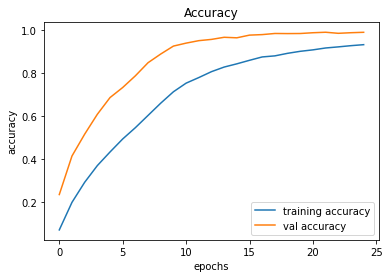

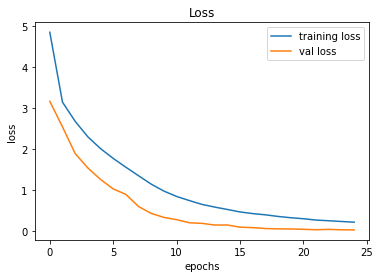

In [21]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(cust_history.history['accuracy'], label='training accuracy')
plt.plot(cust_history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(cust_history.history['loss'], label='training loss')
plt.plot(cust_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
cust2_model.save("trafficclassifier.h5")